# Image classification from scratch

**Author:** Muhammad Haroon <br>
**Linkedin:** linkedin.com/in/muhammad-haroon-ul-hasnain <br>
**Date created:** 2024/04/16<br>
**Description:** Training an image classifier from scratch on the Kaggle Cats vs Dogs dataset.

In this notebook I will train a deep learning model to classify images of cats and dogs from the Kaggle Cats vs Dogs dataset. This notebook is based on the [Keras Image classification from scratch](https://keras.io/examples/vision/image_classification_from_scratch/) example.

This notebook structured as follows:
- Load the data
- Preprocess the data
- Build the model
- Train the model
- Evaluate the model
- Make predictions
- Plot the Confusion Matrix
- Plot the misclassification images

# Importing Packages

Importing the Libraries and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import random
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

2024-05-10 20:30:52.971340: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-10 20:30:52.971533: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-10 20:30:53.109547: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Reading the data

In [2]:
import os
import cv2
import pandas as pd

# Directory containing the "Train" folder
directory = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages"

filepath = []
label = []
corrupted_images = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory, fold)
    
    imgs = os.listdir(f_path)
    
    for img in imgs:
        
        img_path = os.path.join(f_path, img)
        try:
            # Attempt to read the image
            img_array = cv2.imread(img_path)
            
            # Check if the image array is not empty
            if img_array is not None and not img_array.size == 0:
                filepath.append(img_path)
                label.append(fold)
            else:
                corrupted_images.append(img_path)
                
        except Exception as e:
            # If an error occurs, treat it as a corrupted image
            corrupted_images.append(img_path)
            continue

# Concat data paths with labels
file_path_series = pd.Series(filepath, name='filepath')
Label_path_series = pd.Series(label, name='label')
df_train = pd.concat([file_path_series, Label_path_series], axis=1)

# Remove corrupted images from the data frame
for corrupted_img_path in corrupted_images:
    df_train = df_train[df_train['filepath'] != corrupted_img_path]

print("Number of corrupted images removed:", len(corrupted_images))
print("Remaining images in the dataset:", len(df_train))


Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


Number of corrupted images removed: 56
Remaining images in the dataset: 24946


In [3]:
# # Directory containing the "Train" folder
# directory = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages"

# filepath =[]
# label = []

# folds = os.listdir(directory)

# for fold in folds:
#     f_path = os.path.join(directory , fold)
    
#     imgs = os.listdir(f_path)
    
#     for img in imgs:
        
#         img_path = os.path.join(f_path , img)
#         filepath.append(img_path)
#         label.append(fold)
        
# #Concat data paths with labels
# file_path_series = pd.Series(filepath , name= 'filepath')
# Label_path_series = pd.Series(label , name = 'label')
# df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [3]:
# Head 
df_train.head()

filepath label
0  /kaggle/input/microsoft-catsvsdogs-dataset/Pet...   Dog
1  /kaggle/input/microsoft-catsvsdogs-dataset/Pet...   Dog
2  /kaggle/input/microsoft-catsvsdogs-dataset/Pet...   Dog
3  /kaggle/input/microsoft-catsvsdogs-dataset/Pet...   Dog
4  /kaggle/input/microsoft-catsvsdogs-dataset/Pet...   Dog

In [4]:
num_images = 12
class_animal = 'Cat'
directory_path = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat'
image_filenames = os.listdir(directory_path)

if len(image_filenames) < num_images:
    print(f"Only found images {len(image_filenames)} images in {directory_path}, displaying them all.")
    num_images = len(image_filenames)
    
selected_images = random.sample(image_filenames, num_images)

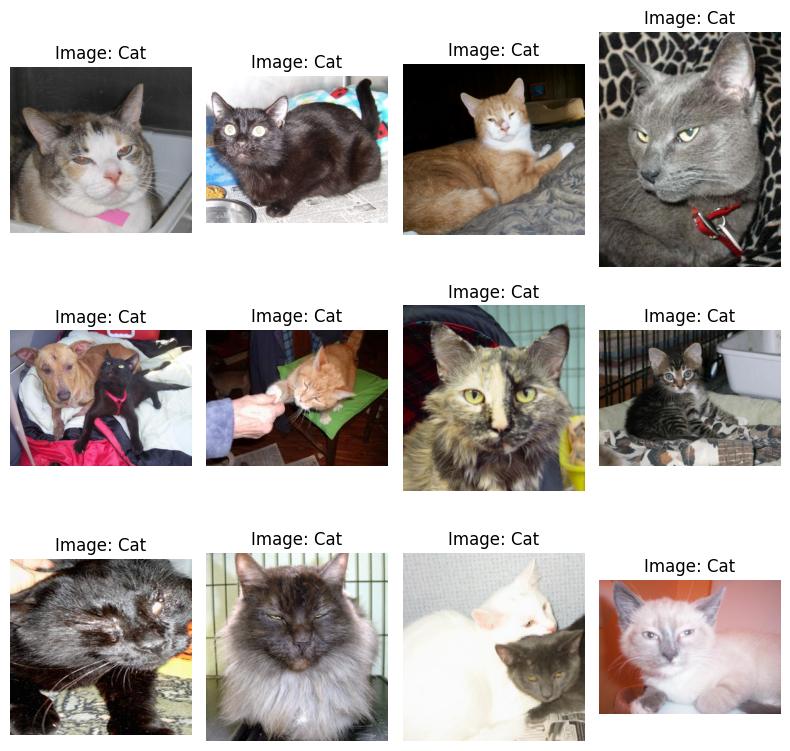

In [5]:
fig, axes = plt.subplots(3,4, figsize=(8, 8))
axes = axes.ravel()

for i, image_file in enumerate(selected_images):
    image_path = os.path.join(directory_path, image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f"Image: {class_animal}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [6]:
num_images = 12
class_animal = 'Dog'
directory_path = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog'
image_filenames = os.listdir(directory_path)

In [7]:
if len(image_filenames) < num_images:
    print(f"Only found images {len(image_filenames)} images in {directory_path}, displaying them all.")
    num_images = len(image_filenames)

In [8]:
selected_images = random.sample(image_filenames, num_images)

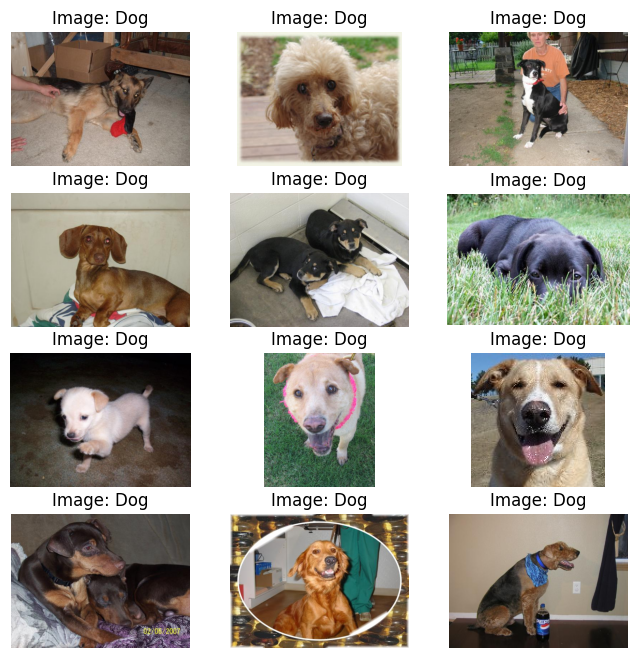

In [9]:

fig, axes = plt.subplots(4, 3, figsize=(8, 8))
axes = axes.ravel()

for i, image_file in enumerate(selected_images):
    image_path = os.path.join(directory_path, image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f"Image: {class_animal}")
    axes[i].axis('off')

In [10]:
def plot_images_from_directory(directory_path, class_animal, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_animal}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

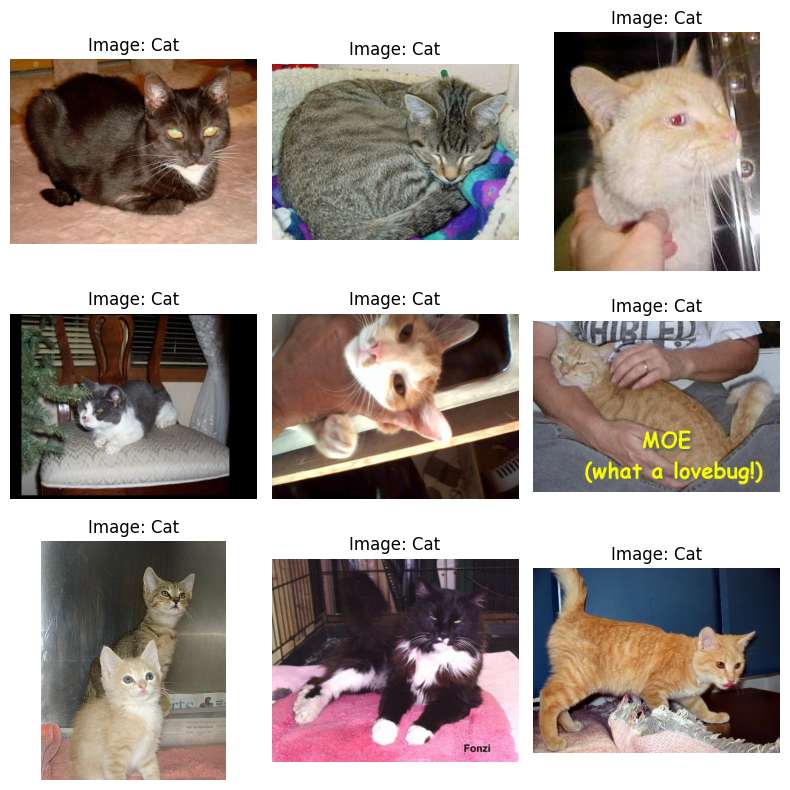

In [11]:
cat_directory_path = '//kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat'
plot_images_from_directory(cat_directory_path, class_animal = 'Cat')

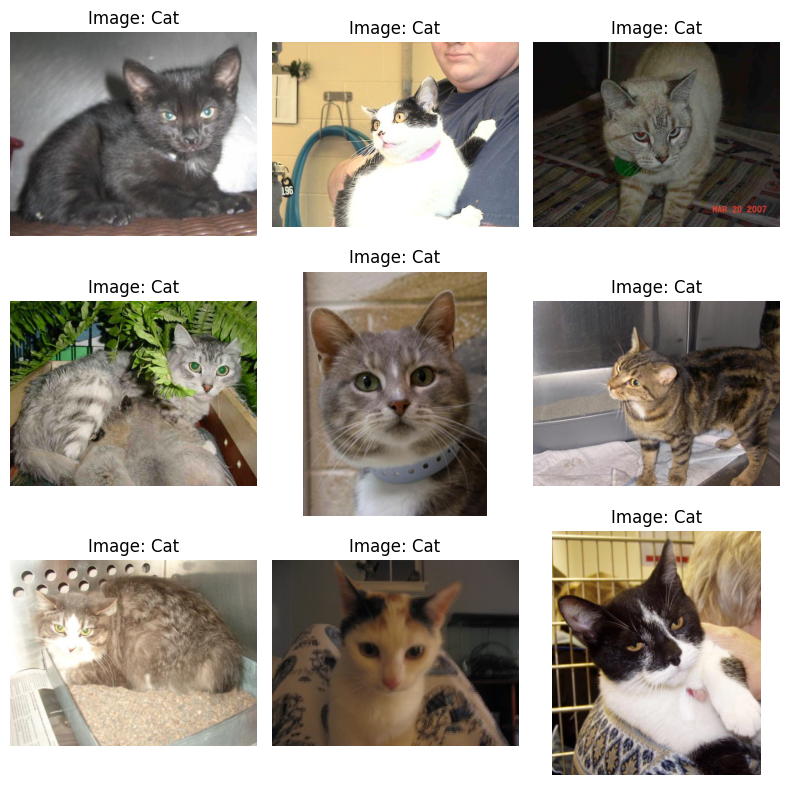

In [12]:
# Placeholder for the directory path
cat_directory_path = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat'  # Replace with your directory path
plot_images_from_directory(cat_directory_path, class_animal = 'Cat')

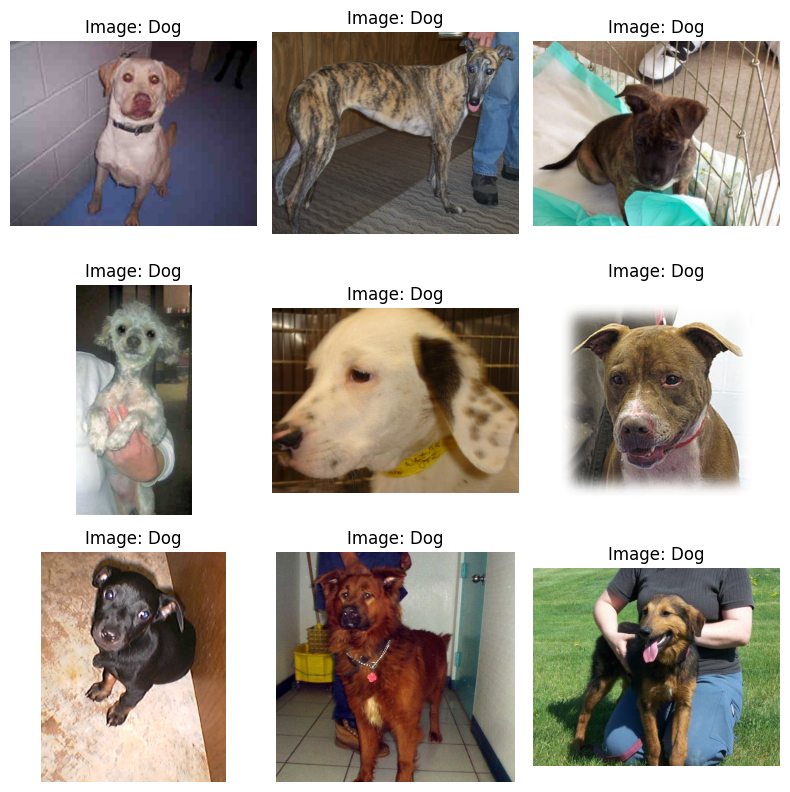

In [13]:
dog_directory_path = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog'
plot_images_from_directory(dog_directory_path, class_animal = 'Dog')

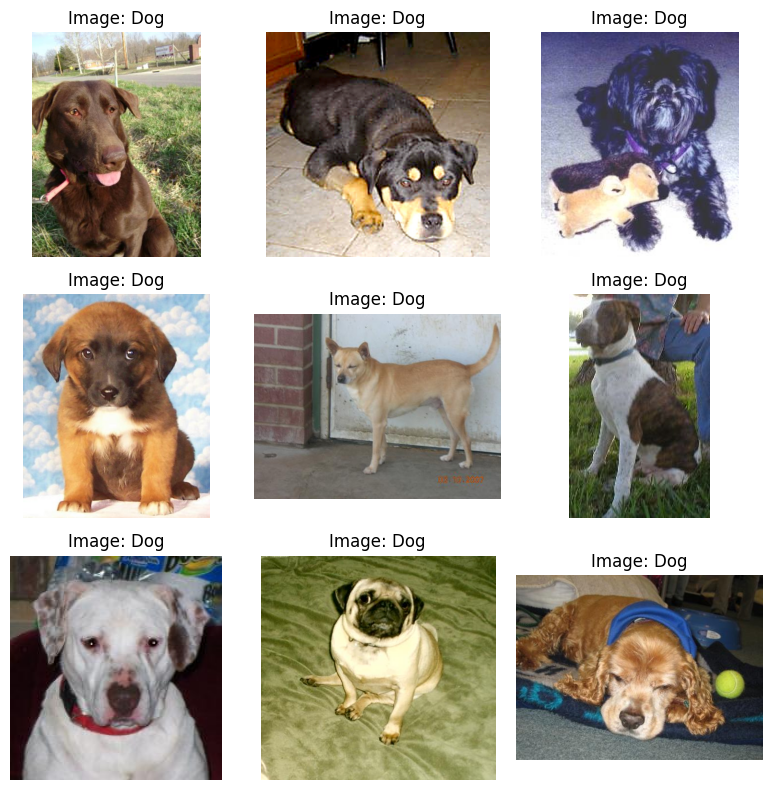

In [14]:
# Placeholder for the directory path
dog_directory_path = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog'  # Replace with your directory path
plot_images_from_directory(dog_directory_path, class_animal = 'Dog')

In [15]:
cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

callses_animals = ['Cats', 'Dogs']
#count = [len(cat_images), len(dog_images)]
#print(count)
len(cat_images), len(dog_images)

(12501, 12501)

# Data Analysis

In [16]:
cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

classes_animals = ['Cats', 'Dogs']
count = [len(cat_images), len(dog_images)]

print(count)

[12501, 12501]


Plot the bar plot of the data to check that cats and dogs images are balanced

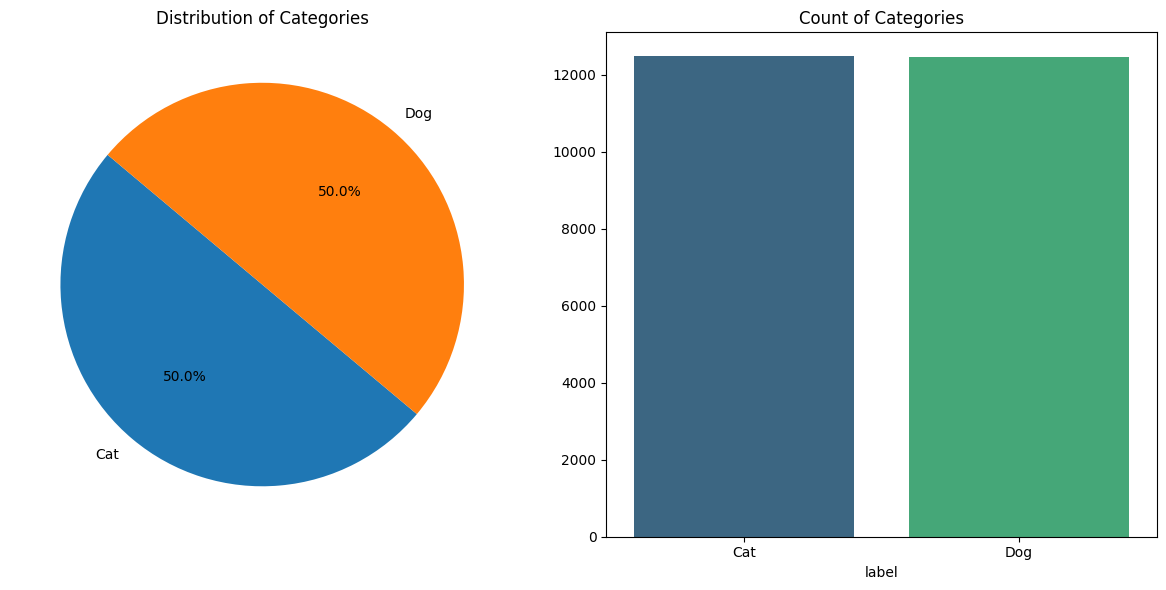

In [17]:
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Building Model

In [34]:
from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
train_df, test_val_df = train_test_split(df_train, test_size=0.3, random_state=42)
test_df, val_df = train_test_split(test_val_df, test_size=0.5, random_state=42)

# Data generator for training
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filepath",
    y_col="label",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

# Data generator for validation
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="filepath",
    y_col="label",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

# Data generator for test
test_generator = train_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="filepath",
    y_col="label",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)


Found 17462 validated image filenames belonging to 2 classes.
Found 3742 validated image filenames belonging to 2 classes.
Found 3742 validated image filenames belonging to 2 classes.


# Getting Class Labels

In [35]:
train_class_labels = train_generator.class_indices
print("training class labels: ", train_class_labels)

validation_class_labels = validation_generator.class_indices
print('validation class labels: ', validation_class_labels)

training class labels:  {'Cat': 0, 'Dog': 1}
validation class labels:  {'Cat': 0, 'Dog': 1}


In [36]:
def plot_images_from_generator(generator, num_images=4):
    images, labels = next(generator)
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img)
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis(False)

    plt.tight_layout()
    plt.show()

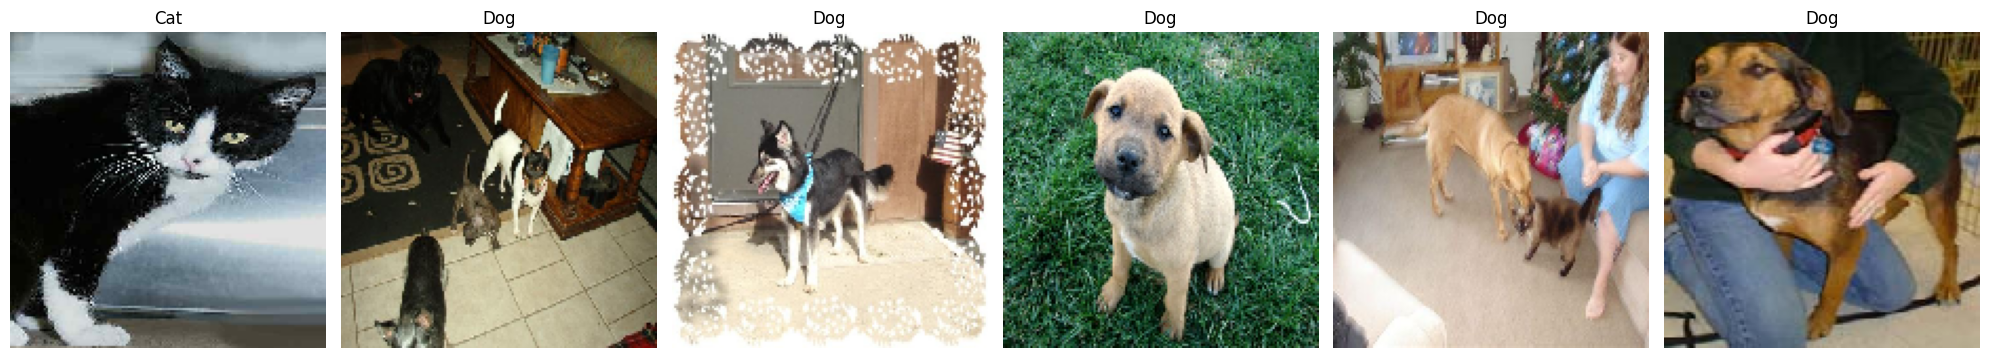

In [37]:
plot_images_from_generator(train_generator, num_images=6)

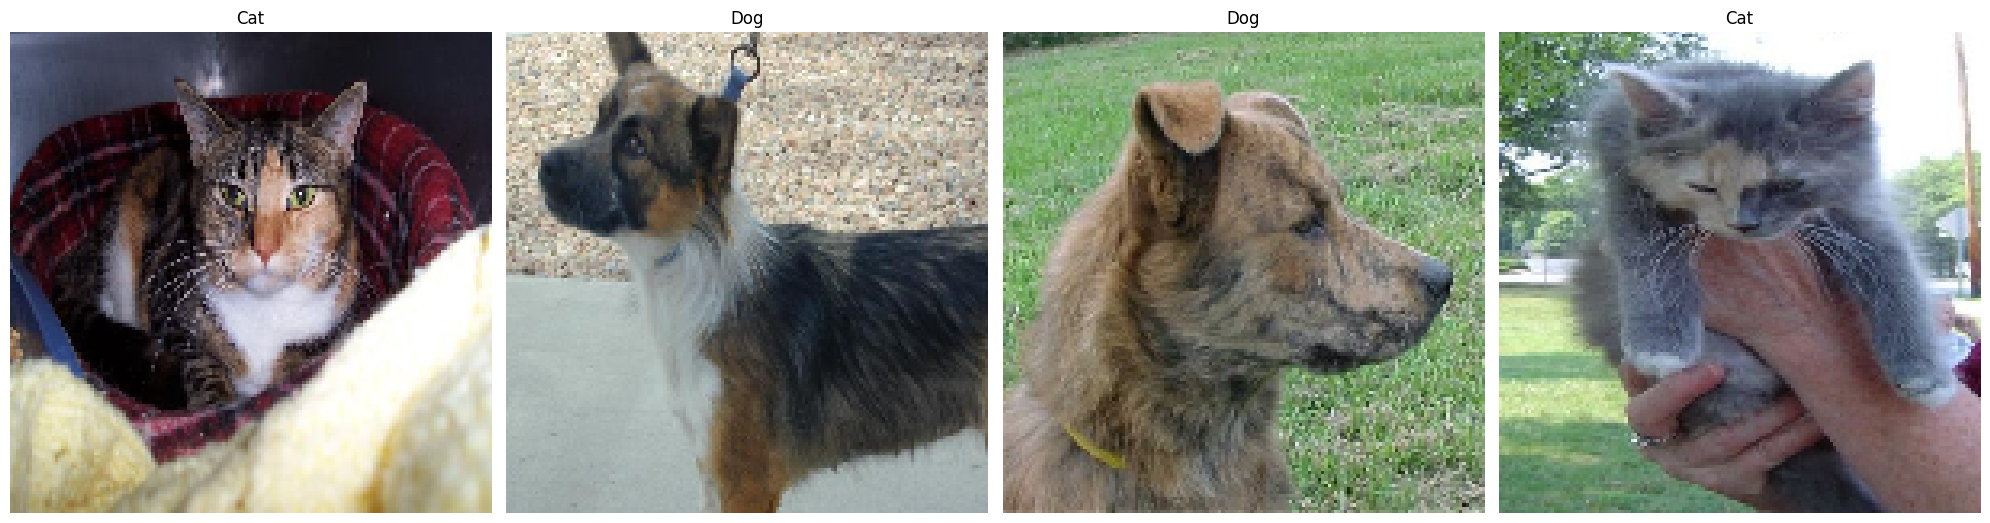

In [38]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [39]:
train_generator.reset()
train_generator.reset()

# Basic CNN Model

In [40]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,811,969 (25.99 MB)

 Trainable params: 6,811,969 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

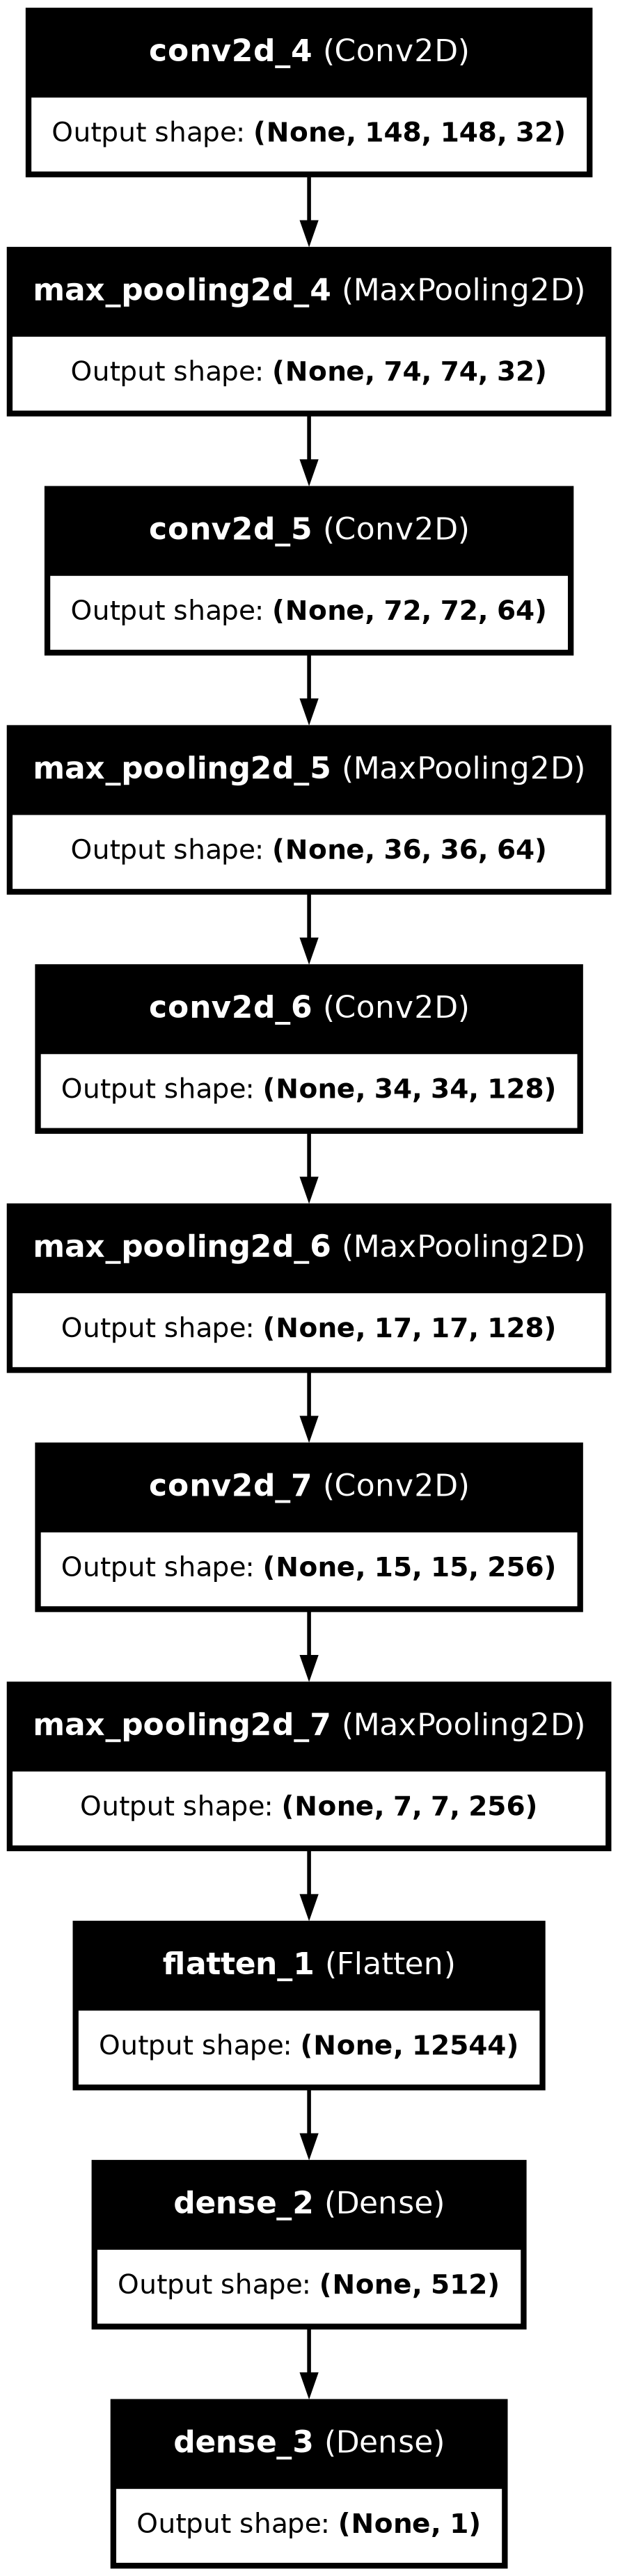

In [41]:
plot_model(model, to_file = 'Architecture.png', show_shapes=True, show_layer_names=True)

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

874.0 188.0


In [45]:
history = model.fit(train_generator,
                    steps_per_epoch=800,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=200)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  4/800 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.6250 - loss: 0.8745

W0000 00:00:1715374909.571645     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


279/800 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.5209 - loss: 0.7021

W0000 00:00:1715374924.741032     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5685 - loss: 0.6707

W0000 00:00:1715374948.266752     172 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


800/800 ━━━━━━━━━━━━━━━━━━━━ 52s 58ms/step - accuracy: 0.5686 - loss: 0.6706 - val_accuracy: 0.7103 - val_loss: 0.5435
Epoch 2/10
  7/800 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7719 - loss: 0.5391

W0000 00:00:1715374956.112867     172 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7437 - loss: 0.5227 - val_accuracy: 0.7464 - val_loss: 0.5031
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.7561 - loss: 0.5067 - val_accuracy: 0.8084 - val_loss: 0.4103
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8170 - loss: 0.3983 - val_accuracy: 0.8103 - val_loss: 0.4103
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.8311 - loss: 0.3771 - val_accuracy: 0.8426 - val_loss: 0.3448
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8558 - loss: 0.3137 - val_accuracy: 0.8495 - val_loss: 0.3409
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.8733 - loss: 0.2958 - val_accuracy: 0.8437 - val_loss: 0.3639
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9099 - loss: 0.2454 - val_accuracy: 0.8405 - val_loss: 0.3580
Epoch 9/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.9038 - loss: 0.2299 - val_accurac

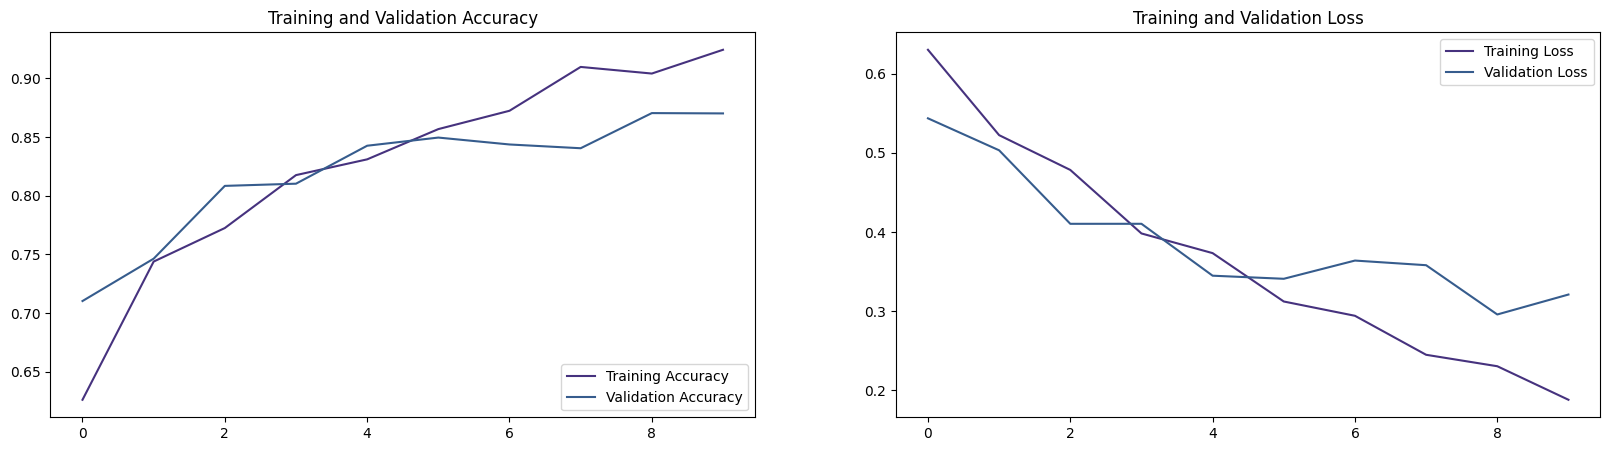

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model Evluation


In [48]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8725 - loss: 0.3190
Test accuracy: 86.64%
Test loss: 0.33
